In [60]:
%load_ext autoreload
%autoreload 2
from src import ODE_euler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NOMBRE: Edison Quizhpe

EJERCICIO1: FUNCION REAL y APROXIMADA

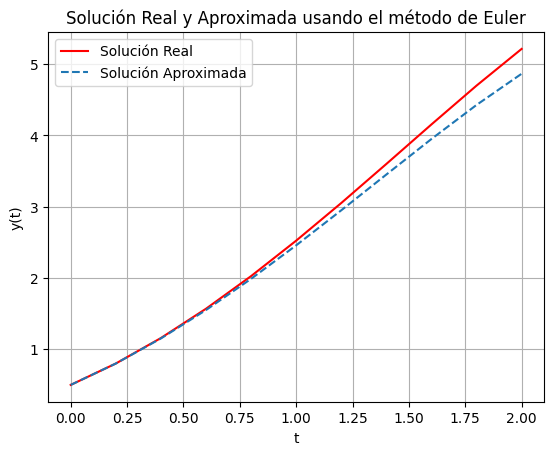

In [61]:
import math
import matplotlib.pyplot as plt

# Funcion Real
def f_real(t: float, y: float) -> float:
    return 2 * (t + 1) - 0.5 * math.exp(t)

# Parámetros del problema
a = 0
b = 2
y_t0_real = (0 + 1)**2 - 0.5 * math.exp(0)  
N = 10

ys_real, ts_real, h_real = ODE_euler(a=a, b=b, f=f_real, y_t0=y_t0_real, N=N)

# Funcion Aproximada
def f_approx(t: float, y: float) -> float:
    return y - (t * t) + 1 

# Parámetros del problema
y_t0_aproximado = 0.5 

ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=a, b=b, f=f_approx, y_t0=y_t0_aproximado, N=N)

# Plotting both solutions
plt.plot(ts_real, ys_real, label='Solución Real', color='red')
plt.plot(ts_aproximado, ys_aproximado,linestyle = '--', label='Solución Aproximada')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Real y Aproximada usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()


EJERCICIO 2: 

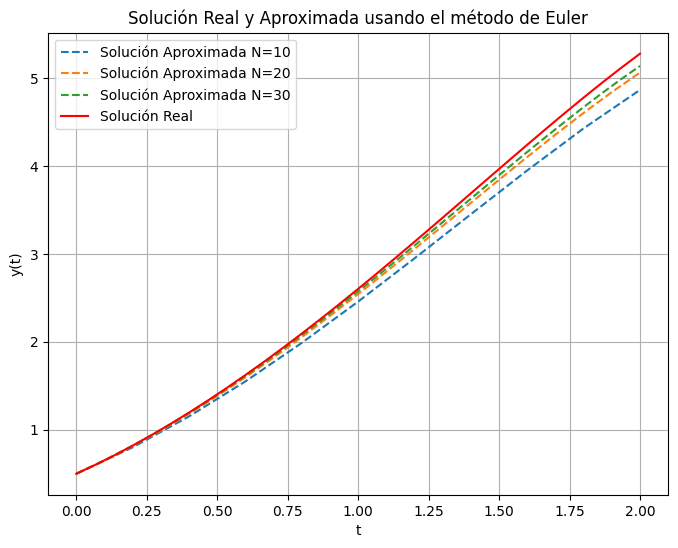

In [62]:
import math
import matplotlib.pyplot as plt

# Método de Euler
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t_values = [a + i * h for i in range(N+1)]
    y_values = [y_t0]
    for i in range(1, N+1):
        y_values.append(y_values[-1] + h * f(t_values[i-1], y_values[-1]))
    return y_values, t_values, h

# Función Real
def f_real(t: float, y: float) -> float:
    return 2 * (t + 1) - 0.5 * math.exp(t)

# Parámetros del problema para la solución real
a = 0
b = 2
y_t0_real = (0 + 1)**2 - 0.5 * math.exp(0)
N_values = [10, 20, 30]  # Diferentes valores de N

# Función Aproximada
def f_approx(t: float, y: float) -> float:
    return y - (t * t) + 1

# Inicialización del gráfico
plt.figure(figsize=(8, 6))

# Graficar para diferentes valores de N
for N in N_values:
    ys_aproximado, ts_aproximado, h_aproximado = ODE_euler(a=a, b=b, f=f_approx, y_t0=0.5, N=N)
    
    # Graficando las soluciones aproximadas
    plt.plot(ts_aproximado, ys_aproximado, linestyle='--', label=f'Solución Aproximada N={N}')

# Graficar la solución real en el gráfico
ys_real, ts_real, h_real = ODE_euler(a=a, b=b, f=f_real, y_t0=y_t0_real, N=30)
plt.plot(ts_real, ys_real, label='Solución Real', color='red')

# Configuración del gráfico
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solución Real y Aproximada usando el método de Euler')
plt.legend()
plt.grid(True)
plt.show()


EJERCICIO 3:

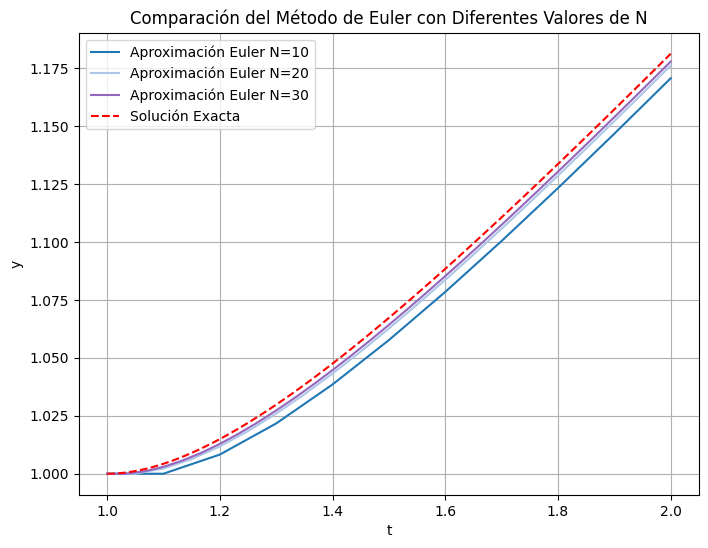

In [63]:
from src import ODE_euler
import numpy as np
import matplotlib.pyplot as plt

# Definir la ecuación diferencial dy/dt = y/t - (y/t)^2
def f(t, y):
    return y/t - (y/t)**2

# Parámetros iniciales
a = 1      # Tiempo inicial
b = 2      # Tiempo final
y_t0 = 1   # Condición inicial

# Solución exacta de la ecuación diferencial
def exact_solution(t):
    return t / (1 + np.log(t))

# Diferentes valores de N
N_values = [10, 20, 30]
plt.figure(figsize=(8, 6))

# Colores para las aproximaciones de Euler
colors = ['#1f77b4', '#aec7e8', '#9467bd']  # Azul, celeste, morado

for i, N in enumerate(N_values):
    ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)
    plt.plot(ts, ys, linestyle='-', label=f'Aproximación Euler N={N}', color=colors[i])

# Calcular la solución exacta en una malla más fina para comparación
ts_fine = np.linspace(a, b, 100)
ys_exact = [exact_solution(t) for t in ts_fine]
plt.plot(ts_fine, ys_exact, linestyle='--', color='r', label='Solución Exacta')

# Configuración del gráfico
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparación del Método de Euler con Diferentes Valores de N')
plt.legend()
plt.grid(True)
plt.show()
